In [165]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
data=pd.read_csv('titanic_data.csv')

In [167]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [168]:
data.shape

(891, 12)

In [169]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [170]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

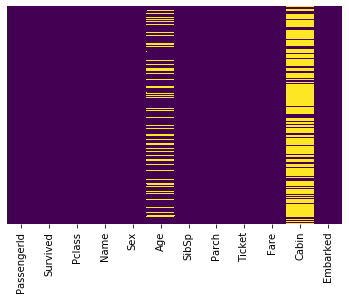

In [171]:
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False,cbar=False)

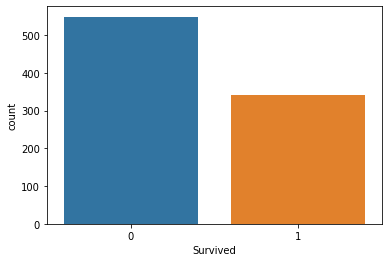

In [172]:
sns.countplot(x='Survived',data=data)

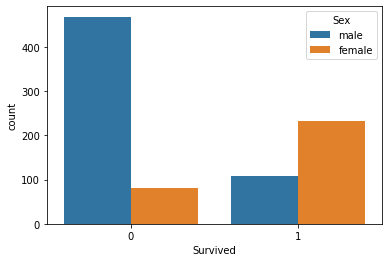

In [173]:
sns.countplot(x='Survived',hue='Sex',data=data)

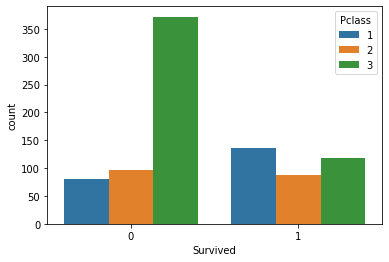

In [174]:
sns.countplot(x='Survived',hue='Pclass',data=data)

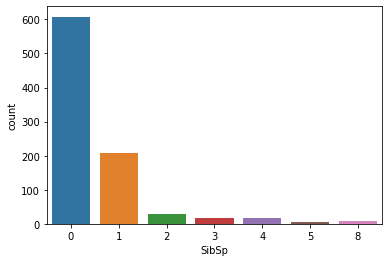

In [175]:
sns.countplot(x='SibSp',data=data)

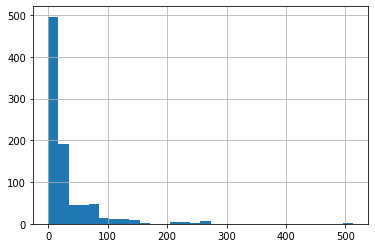

In [176]:
data['Fare'].hist(bins=30)

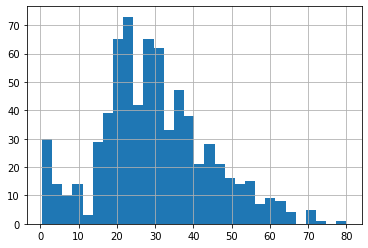

In [177]:
data['Age'].hist(bins=30)

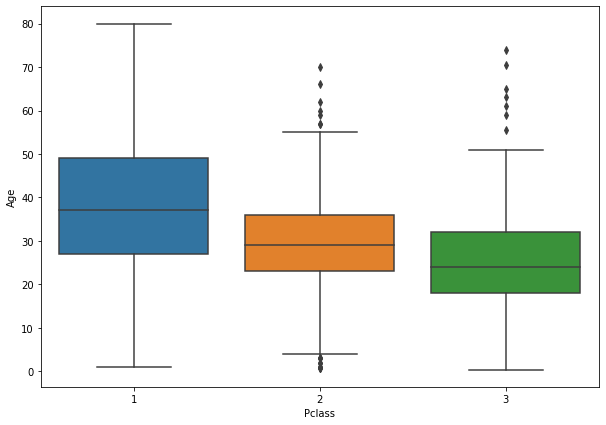

In [178]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=data)

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [180]:
data.dropna(inplace=True)

In [181]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [182]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return(Age)

In [183]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

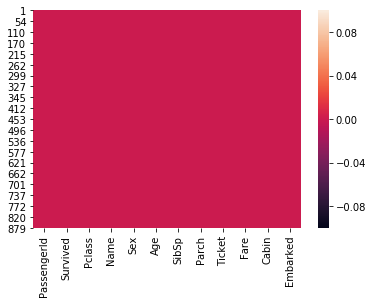

In [184]:
sns.heatmap(data.isnull())

In [185]:
data.drop(columns=['Cabin'],axis=1,inplace=True)

In [186]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [187]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [188]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [189]:
data=pd.concat([data,sex,embark],axis=1)

In [190]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,0,0,1


In [191]:
data.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [192]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,1,38.0,1,0,71.2833,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
10,1,3,4.0,1,1,16.7000,0,0,1
11,1,1,58.0,0,0,26.5500,0,0,1


In [198]:
X=data.drop(['Survived'],axis=1,)

In [202]:
y=data['Survived']

In [204]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,1,38.0,1,0,71.2833,0,0,0
3,1,35.0,1,0,53.1000,0,0,1
6,1,54.0,0,0,51.8625,1,0,1
10,3,4.0,1,1,16.7000,0,0,1
11,1,58.0,0,0,26.5500,0,0,1


In [203]:
y.head()

1     1
3     1
6     0
10    1
11    1
Name: Survived, dtype: int64

In [197]:
from sklearn.model_selection import train_test_split

In [206]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=2,test_size=0.3)

In [208]:
from sklearn.linear_model import LogisticRegression

In [209]:
model=LogisticRegression()

In [210]:
model.fit(x_train,y_train)

D:\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [211]:
predictions=model.predict(x_test)

In [212]:
from sklearn.metrics import classification_report

In [213]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.64      0.67      0.65        21\n           1       0.79      0.76      0.78        34\n\n    accuracy                           0.73        55\n   macro avg       0.71      0.72      0.71        55\nweighted avg       0.73      0.73      0.73        55\n'

In [214]:
from sklearn.metrics import confusion_matrix

In [215]:
confusion_matrix(y_test,predictions)

array([[14,  7],
       [ 8, 26]], dtype=int64)

In [216]:
from sklearn.metrics import accuracy_score

In [217]:
accuracy_score(y_test,predictions)

0.7272727272727273